#Mean Absolute Error
$L_{MAE} = |y_{hat} - y|$

$|x| = \sqrt{x^2} = (x^2)^{\frac{1}{2}}$

$((x^2)^{\frac{1}{2}})' = \frac{x}{|x|}$

$((u^2)^{\frac{1}{2}})' = \frac{u}{|u|}u'$

#Gradient of Mean Squared Error
$(L_{MAE})' = \frac{y_{hat} - y}{|y_{hat} - y|}(y_{hat}−y)'$

In [76]:
def loss_MAE(yi_hat,yi):
  loss = abs(yi_hat-yi)
  d_loss = (yi_hat-yi) / abs(yi_hat-yi)
  return loss, d_loss

#Mean Squared Error
$L_{MSE}=\frac{1}{2}(y_{hat}−y)^2$

$(u^2)' = 2.u.u'$

###Gradient of Mean Squared Error
$(L_{MSE})'=(y_{hat}−y)(y_{hat}−y)'$

In [77]:
def loss_MSE(yi_hat,yi):
  loss = 1/2 *(yi_hat - yi)**2
  d_loss = (yi_hat - yi)
  return loss, d_loss

#Mean Squared Logarithmic Error
$L_{MSLE}=\frac{1}{2}(log_e(1+y) - log_e(1+y_{hat}))^2$

$(u^2)' = 2.u.u'$

$ln(e) = log_e(e) = 1$

$(ln(u))' = (log_e(u))' =  \frac{u'}{u}$

$(log_e(1+y_{hat}))' = \frac{(1+y_{hat})'}{(1+y_{hat})}$

###Gradient of Mean Squared Logarithmic Error
$(L_{MSE})'=(log_e(1+y) - log_e(1+y_{hat}))(-\frac{(1+y_{hat})'}{(1+y_{hat})}) = \frac{log_e(1+y_{hat})-log_e(1+y)}{1+y_{hat}}(1+y_{hat})'$

In [78]:
def loss_MSLE(yi_hat,yi):
  loss = 1/2 * (np.log(1+yi)-np.log(1+yi_hat))**2
  d_loss = (np.log(1+yi_hat)-np.log(1+yi))/(1+yi_hat)
  return loss, d_loss

#Huberloss
$L(h_{hat} - y) =
\left\{
\begin{array}{cc}
\frac{1}{2}(h_{hat} - y)^2 for |h_{hat} - y|\leq\delta\\
\delta|h_{hat} - y|- \frac{1}{2}\delta^2 otherwise
\end{array}
\right. $

###Gradient of Huberloss
$L^{'}(h_{hat} - y) =
\left\{
\begin{array}{cc}
(h_{hat} - y)(y_{hat}−y)' for |h_{hat} - y|\leq\delta\\
\frac{\delta(y_{hat}-y)}{|y_{hat}-y|}(y_{hat}−y)' otherwise
\end{array}
\right. $

In [79]:
def loss_Huber(yi_hat,yi,delta):
  loss = []
  d_loss = []
  for id in range(len(yi)):
    if abs(yi_hat[id]-yi[id]) < delta:
      loss.append(1/2*(yi_hat[id] - yi[id])*(yi_hat[id] - yi[id]))
      d_loss.append(yi_hat[id]-yi[id])
    else:
      loss.append((delta*abs(yi_hat[id]-yi[id]) - 0.5*delta*delta))
      d_loss.append(delta*(yi_hat[id]-yi[id])/abs(yi_hat[id]-yi[id]))
  return loss, d_loss

## Understanding the Data

In [81]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


In [82]:
def plot_features(trainset, testset=None, spc_feature = None):
  import matplotlib.pyplot as plt
  features = trainset.describe().columns.to_list()
  if testset is None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature is None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1
  elif testset is not None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature == None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          plt.hist(testset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.scatter(testset[i], testset[spc_feature],  color='red')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1

In [83]:
import pandas as pd
import numpy as np
file_name_dataset = 'FuelConsumptionCo2.csv'
df = pd.read_csv(file_name_dataset)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [84]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [86]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2).highlight_null(color='#f1f1f1')

<ipython-input-86-d65b0c965d28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,nan,nan,nan,nan,nan,nan,nan,nan
ENGINESIZE,nan,1.00,0.93,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,nan,0.93,1.00,0.80,0.72,0.78,-0.77,0.85
FUELCONSUMPTION_CITY,nan,0.83,0.80,1.00,0.97,1.00,-0.94,0.90
FUELCONSUMPTION_HWY,nan,0.78,0.72,0.97,1.00,0.99,-0.89,0.86
FUELCONSUMPTION_COMB,nan,0.82,0.78,1.00,0.99,1.00,-0.93,0.89
FUELCONSUMPTION_COMB_MPG,nan,-0.81,-0.77,-0.94,-0.89,-0.93,1.00,-0.91
CO2EMISSIONS,nan,0.87,0.85,0.90,0.86,0.89,-0.91,1.00


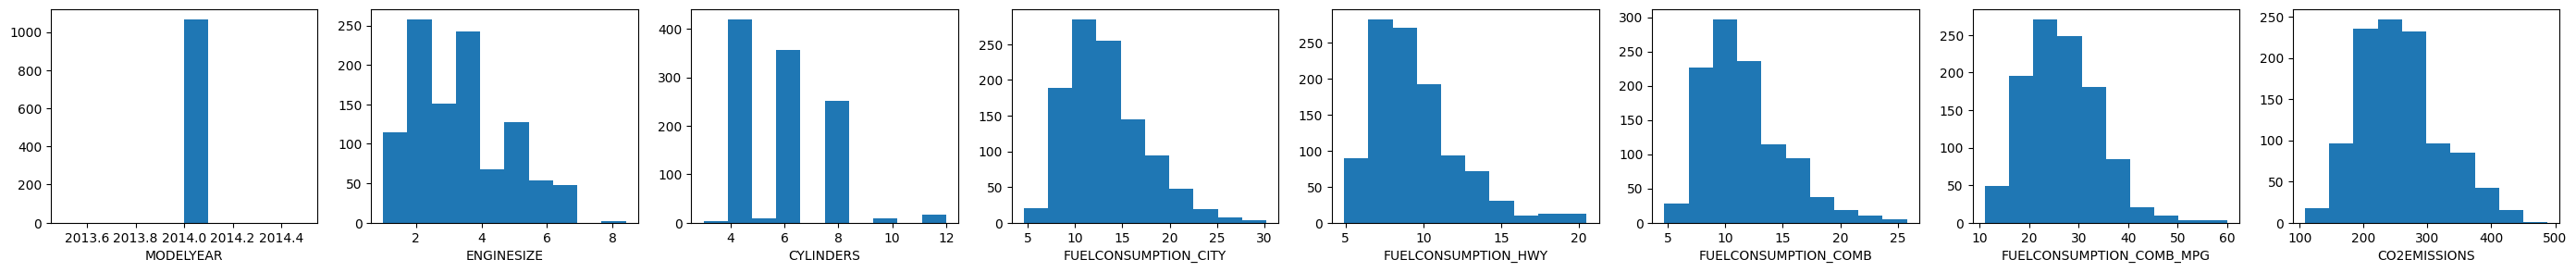

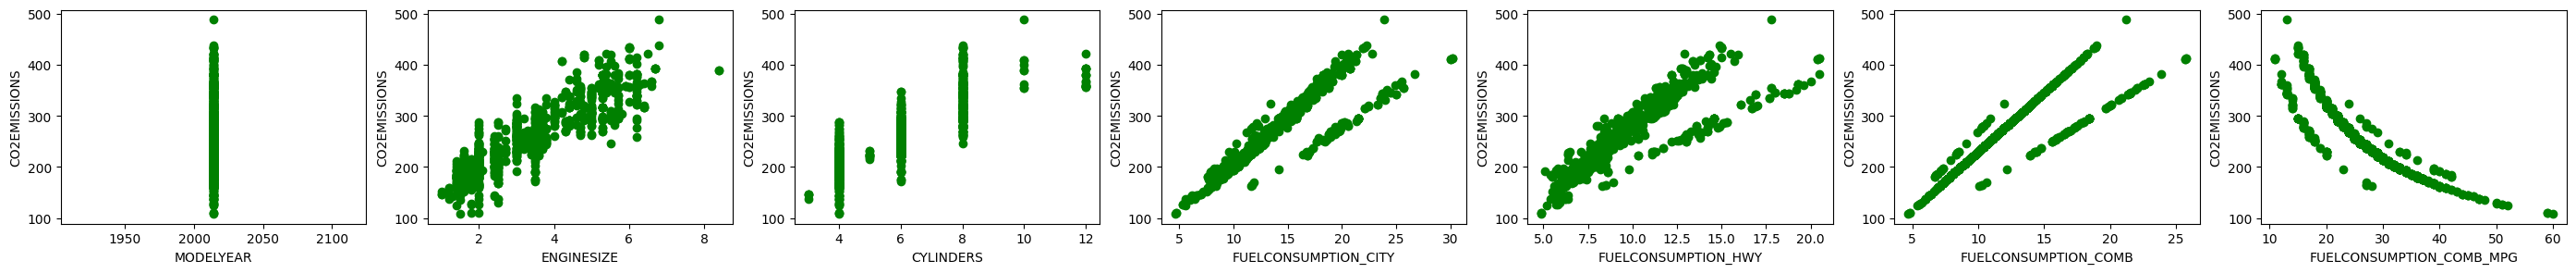

In [87]:
plot_features(df)
plot_features(df, spc_feature = 'CO2EMISSIONS')

In [88]:
#select some features using for regression.
features_list = ['ENGINESIZE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
data = df[features_list]
data.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


##Creating train and test dataset

In [89]:
#Create 2 sets: train set and test set
#create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(data)) < 0.8 #select random rows (< 80% of len(df))
print('number of rows in df: ',len(data))
print('number of values in msk: ',len(msk))
print('number of True in msk: ',msk.sum(),'ratio: ',msk.sum()/len(msk))
print('number of False in msk: ',(~msk).sum(),'ratio: ',(~msk).sum()/len(msk))
#np.random.rand(n) => n random values [0,1) => condition: random values > 0.8 => True
train = data[msk] #cdf of True
test = data[~msk] #~msk: True => False and False => True, cdf[~msk]: cdf of False

number of rows in df:  1067
number of values in msk:  1067
number of True in msk:  855 ratio:  0.8013120899718837
number of False in msk:  212 ratio:  0.19868791002811623


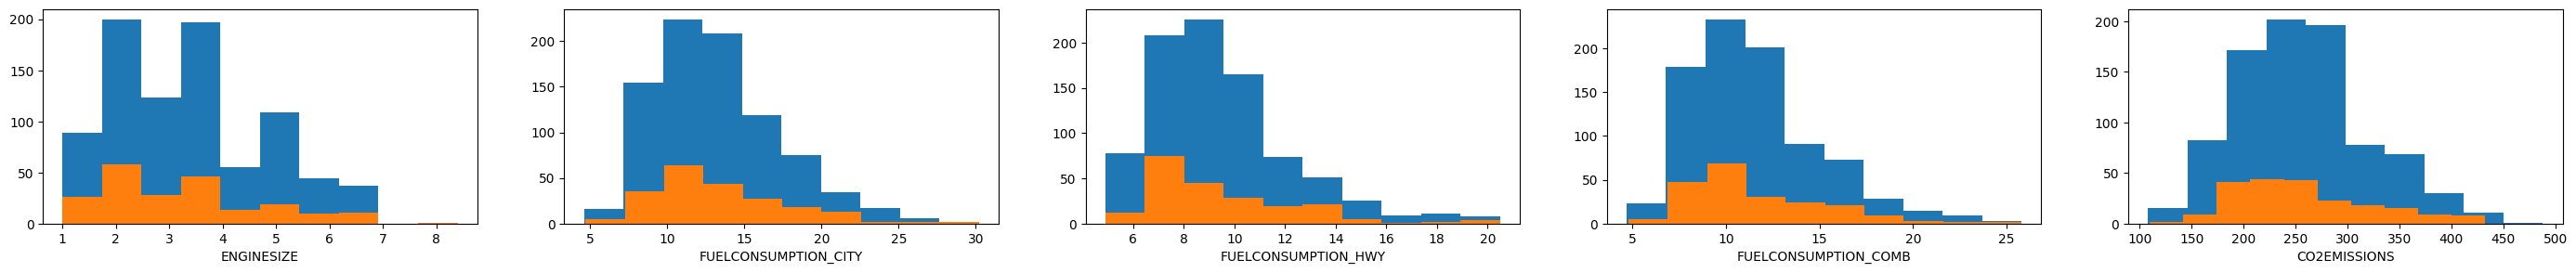

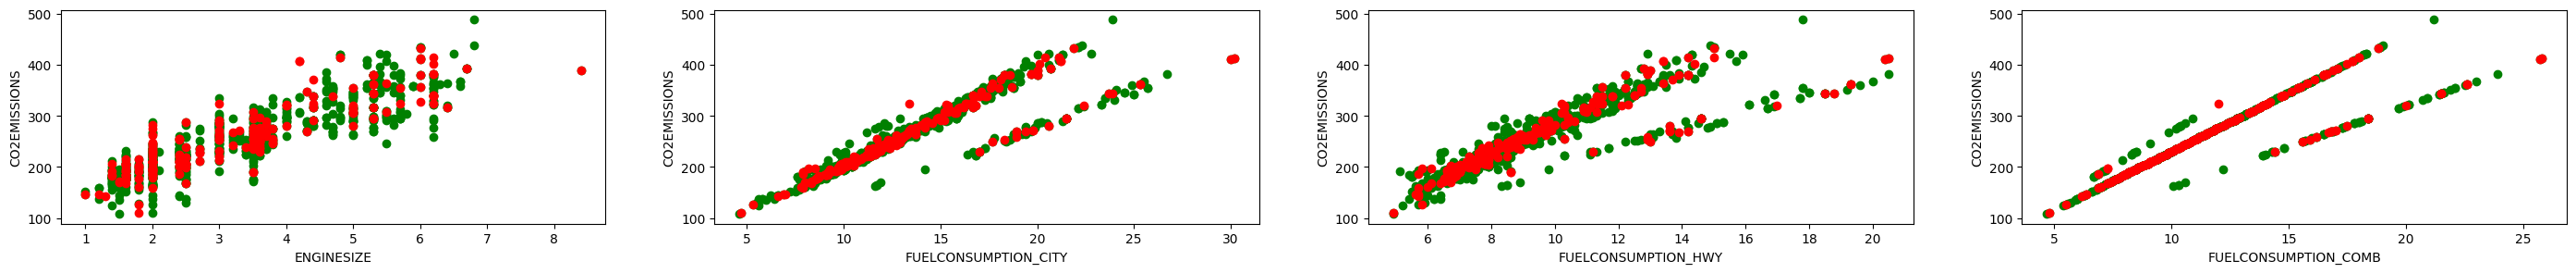

In [90]:
features_list = ['ENGINESIZE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
plot_features(train[features_list], test[features_list])
plot_features(train[features_list], test[features_list] ,spc_feature = 'CO2EMISSIONS')

#Linear regression using Mini-Batch Gradient Descent (MAE, MSE, MSLE, Huberloss)

In [91]:
def mini_batch_gradient_descent (thetas, X_train, y_train , n_epochs = 1000, minibatch_size = 32, loss_func = 'MSE', learning_rate =0.01, delta=5):
  #thetas = np.random.randn(X_train.shape[1] , 1)
  thetas_path = [ thetas ]
  losses = []
  N = len(y_train)
  for epoch in range (n_epochs) :
    shuffled_indices = np. random.permutation (N)
    X_b_shuffled = X_train [ shuffled_indices ]
    y_shuffled = y_train [ shuffled_indices ]
    for i in range (0 , N , minibatch_size ):
      xi = X_b_shuffled [ i : i + minibatch_size ]
      yi = y_shuffled [ i: i + minibatch_size ]
      yi_hat = xi.dot(thetas)
      if loss_func == 'MSE':
        loss, d_loss = loss_MSE(yi_hat,yi)
      elif loss_func == 'MAE':
        loss, d_loss = loss_MAE(yi_hat,yi)
      elif loss_func == 'MSLE':
        loss, d_loss = loss_MSLE(yi_hat,yi)
      elif loss_func == 'Huber':
        loss, d_loss = loss_Huber(yi_hat,yi,delta)
      gradients = xi.T.dot(d_loss)
      thetas = thetas - learning_rate*(gradients/minibatch_size)
      thetas_path.append (thetas)
      loss_mean = np.sum(loss) / minibatch_size
      losses.append (loss_mean)
  return thetas_path , losses

def prediction(data, thetas):
  return data@thetas

##Normalization

In [92]:
def normalization(data, X_features, y_feature, normalization = 0) :
  X_data = data[X_features].to_numpy()
  y_data = data[y_feature].to_numpy()
  N = len(X_data)
  normed_data = X_data
  if normalization == 1: #Min-max normalization for each feature
    normed_data = min_max_scaling_1feature(X_data)
  elif normalization == 2: #Min-max normalization for all features
    normed_data = min_max_scaling_allfeatures (X_data)
  elif normalization == 3: #Mean normalization for all features
    normed_data = mean_normalization (X_data)
  X_ = np.c_[np.ones((N, 1)),normed_data]
  return X_, y_data

def min_max_scaling_1feature(X):
  normed_X = np.zeros(X.shape)
  for i in range(X.shape[1]):
    normed_X[:,i:i+1] = (X[:,i:i+1]-min(X[:,i:i+1]))/(max(X[:,i:i+1])-min(X[:,i:i+1]))
  return normed_X

def min_max_scaling_allfeatures (X) :
  normed_X = (X - np.min(X))/(np.max(X)-np.min(X))
  return normed_X

def  mean_normalization (X) :
  normed_X  = (X - np.mean(X)) / (np.max(X)- np.min(X))
  return normed_X

##Simple linear regression ($y = ax + b$)

###Choosing features

In [93]:
features_list = ['ENGINESIZE', 'CO2EMISSIONS']

X_train, y_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 0)
X_1_train,y_1_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 1)
X_2_train,y_2_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 2)
X_3_train,y_3_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 3)

X_test, y_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 0)
X_1_test,y_1_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 1)
X_2_test,y_2_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 2)
X_3_test,y_3_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 3)

###Modeling

In [94]:
features_no = len(features_list[:-1])
thetas = np.random.randn(features_no + 1, 1)
thetas

array([[ 0.5291253 ],
       [-0.04101931]])

270000
best loss is 68.61122583041312 with index is 184706 and best theta is [[164.09808402]
 [288.50316456]]


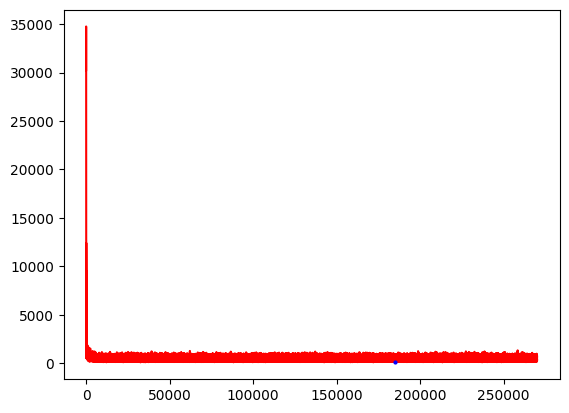

In [96]:
import matplotlib.pyplot as plt
#MSE loss
sgd_theta_MSE , losses_MSE = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'MSE', learning_rate =0.01, delta=5)
best_loss_MSE = min(losses_MSE)
index_best_loss_MSE = losses_MSE.index(min(losses_MSE))
best_theta_MSE = sgd_theta_MSE[losses_MSE.index(min(losses_MSE))]
print(len(losses_MSE))
print(f'best loss is {best_loss_MSE} with index is {index_best_loss_MSE} and best theta is {best_theta_MSE}')

plt.plot(losses_MSE, color ="r")
plt.plot(index_best_loss_MSE,best_loss_MSE,'bo', markersize=2, label='best loss')
plt.show()

270000
best loss is 8.353923463791268 with index is 229229 and best theta is [[178.5294378 ]
 [237.57777714]]


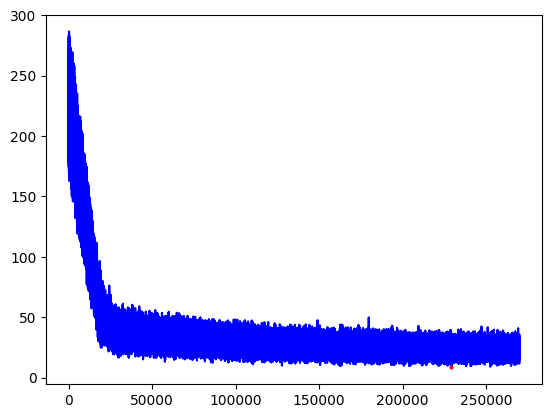

In [97]:
#MAE loss
sgd_theta_MAE , losses_MAE = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'MAE', learning_rate =0.01, delta=5)
best_loss_MAE = min(losses_MAE)
index_best_loss_MAE = losses_MAE.index(min(losses_MAE))
best_theta_MAE = sgd_theta_MAE[losses_MAE.index(min(losses_MAE))]
print(len(losses_MAE))
print(f'best loss is {best_loss_MAE} with index is {index_best_loss_MAE} and best theta is {best_theta_MAE}')

plt.plot(losses_MAE, color ="b")
plt.plot(index_best_loss_MAE,best_loss_MAE,'ro', markersize=2, label='best loss')
plt.show()

270000
best loss is 0.24620349299547933 with index is 257957 and best theta is [[79.95796392]
 [26.02553309]]


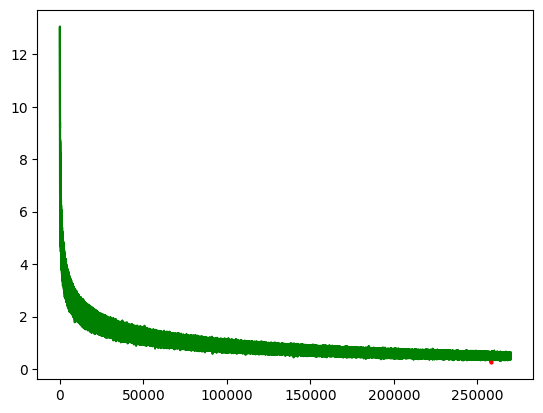

In [98]:
#MSLE loss
sgd_theta_MSLE , losses_MSLE = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'MSLE', learning_rate =0.01, delta=5)
best_loss_MSLE = min(losses_MSLE)
index_best_loss_MSLE = losses_MSLE.index(min(losses_MSLE))
best_theta_MSLE = sgd_theta_MSLE[losses_MSLE.index(min(losses_MSLE))]
print(len(losses_MSLE))
print(f'best loss is {best_loss_MSLE} with index is {index_best_loss_MSLE} and best theta is {best_theta_MSLE}')

plt.plot(losses_MSLE, color ="g")
plt.plot(index_best_loss_MSLE,best_loss_MSLE,'ro', markersize=2, label='best loss')
plt.show()

270000
best loss is 29.257335181425404 with index is 46250 and best theta is [[178.02677916]
 [238.10215206]]


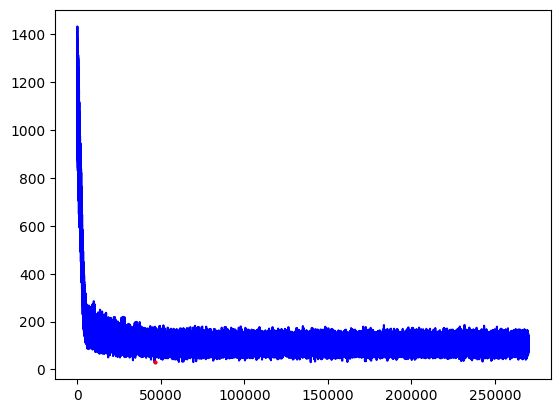

In [99]:
#Huber loss
sgd_theta_Huber , losses_Huber = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'Huber', learning_rate =0.01, delta=5)
best_loss_Huber = min(losses_Huber)
index_best_loss_Huber = losses_Huber.index(min(losses_Huber))
best_theta_Huber = sgd_theta_Huber[losses_Huber.index(min(losses_Huber))]
print(len(losses_Huber))
print(f'best loss is {best_loss_Huber} with index is {index_best_loss_Huber} and best theta is {best_theta_Huber}')

plt.plot(losses_Huber, color ="b")
plt.plot(index_best_loss_Huber,best_loss_Huber,'ro', markersize=2, label='best loss')
plt.show()

###Comparing results by loss types

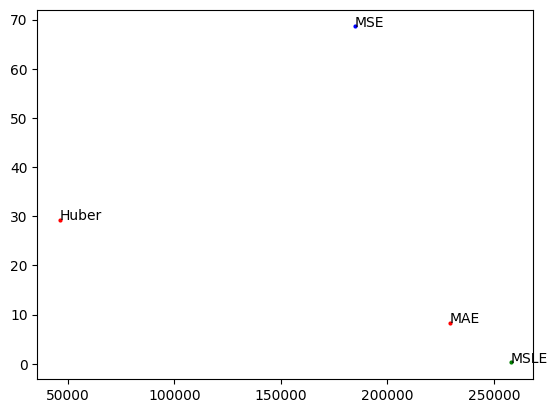

In [100]:
import matplotlib.pyplot
plt.plot(index_best_loss_MSE,best_loss_MSE,'bo', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_MSE,best_loss_MSE, "MSE")
plt.plot(index_best_loss_MAE,best_loss_MAE,'ro', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_MAE,best_loss_MAE, "MAE")
plt.plot(index_best_loss_MSLE,best_loss_MSLE,'go', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_MSLE,best_loss_MSLE, "MSLE")
plt.plot(index_best_loss_Huber,best_loss_Huber,'ro', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_Huber,best_loss_Huber, "Huber")
plt.show()

Text(0, 0.5, 'CO2EMISSIONS')

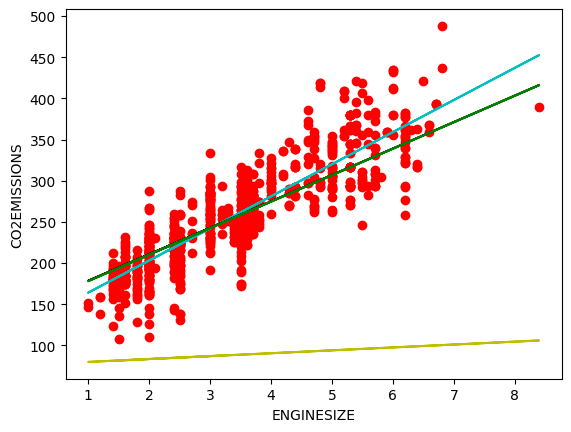

In [102]:
#Plot the fit line over the data:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],  color='red') #plot 2 features
plt.plot(train['ENGINESIZE'], prediction(X_1_train,best_theta_MSE), '-c')
plt.plot(train['ENGINESIZE'], prediction(X_1_train,best_theta_MSLE), '-y')
plt.plot(train['ENGINESIZE'], prediction(X_1_train,best_theta_MAE), '-k')
plt.plot(train['ENGINESIZE'], prediction(X_1_train,best_theta_Huber), '-g')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

###Evaluating

In [103]:
#Evaluate regression model
from sklearn.metrics import r2_score
test_y_hat_MSE = prediction(X_1_test,best_theta_MSE)
test_y_hat_MSLE = prediction(X_1_test,best_theta_MSLE)
test_y_hat_MAE = prediction(X_1_test,best_theta_MAE)
test_y_hat_Huber = prediction(X_1_test,best_theta_Huber)

print('MSE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_MSE - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_MSE - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_MSE) )
print('---')

print('MSLE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_MSLE - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_MSLE - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_MSLE) )
print('---')

print('MAE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_MAE - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_MAE - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_MAE) )
print('---')

print('Huber')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_Huber - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_Huber - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_Huber) )
print('---')

MSE
Mean absolute error: 23.21
Residual sum of squares (MSE): 983.53
R2-score: 0.77
---
MSLE
Mean absolute error: 167.60
Residual sum of squares (MSE): 31872.35
R2-score: -6.32
---
MAE
Mean absolute error: 24.32
Residual sum of squares (MSE): 1117.55
R2-score: 0.74
---
Huber
Mean absolute error: 24.26
Residual sum of squares (MSE): 1118.51
R2-score: 0.74
---


##Multiple Linear Regression ($y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b$)

###Choosing features

In [104]:
features_list = ['ENGINESIZE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']

X_train, y_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 0)
X_1_train,y_1_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 1)
X_2_train,y_2_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 2)
X_3_train,y_3_train = normalization(train, features_list[:-1], features_list[-1:],normalization = 3)

X_test, y_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 0)
X_1_test,y_1_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 1)
X_2_test,y_2_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 2)
X_3_test,y_3_test = normalization(test, features_list[:-1], features_list[-1:],normalization = 3)

###Modeling

In [105]:
features_no = len(features_list[:-1])
thetas = np.random.randn(features_no + 1, 1)
thetas

array([[-0.50867321],
       [ 1.42700076],
       [ 0.80175314],
       [ 1.69136478],
       [-0.31711646]])

270000
best loss is 29.708049809993305 with index is 52541 and best theta is [[143.21647553]
 [143.84549431]
 [ 91.77376998]
 [ 40.65969679]
 [ 73.93924945]]


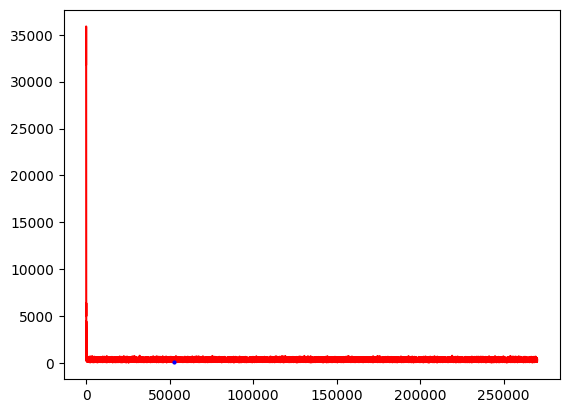

In [106]:
sgd_theta_MSE , losses_MSE = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'MSE', learning_rate =0.01, delta=5)
best_loss_MSE = min(losses_MSE)
index_best_loss_MSE = losses_MSE.index(min(losses_MSE))
best_theta_MSE = sgd_theta_MSE[losses_MSE.index(min(losses_MSE))]
print(len(losses_MSE))
print(f'best loss is {best_loss_MSE} with index is {index_best_loss_MSE} and best theta is {best_theta_MSE}')

plt.plot(losses_MSE, color ="r")
plt.plot(index_best_loss_MSE,best_loss_MSE,'bo', markersize=2, label='best loss')
plt.show()

270000
best loss is 2.857644830880484 with index is 185192 and best theta is [[130.93132679]
 [100.65810295]
 [105.58813741]
 [100.70520693]
 [102.94234148]]


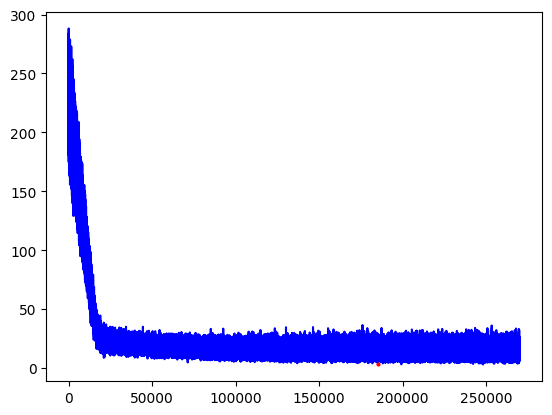

In [107]:
sgd_theta_MAE , losses_MAE = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'MAE', learning_rate =0.01, delta=5)
best_loss_MAE = min(losses_MAE)
index_best_loss_MAE = losses_MAE.index(min(losses_MAE))
best_theta_MAE = sgd_theta_MAE[losses_MAE.index(min(losses_MAE))]
print(len(losses_MAE))
print(f'best loss is {best_loss_MAE} with index is {index_best_loss_MAE} and best theta is {best_theta_MAE}')

plt.plot(losses_MAE, color ="b")
plt.plot(index_best_loss_MAE,best_loss_MAE,'ro', markersize=2, label='best loss')
plt.show()

270000
best loss is 0.2752574834164675 with index is 269513 and best theta is [[69.81972885]
 [22.78767109]
 [23.63801109]
 [21.13972101]
 [21.52057614]]


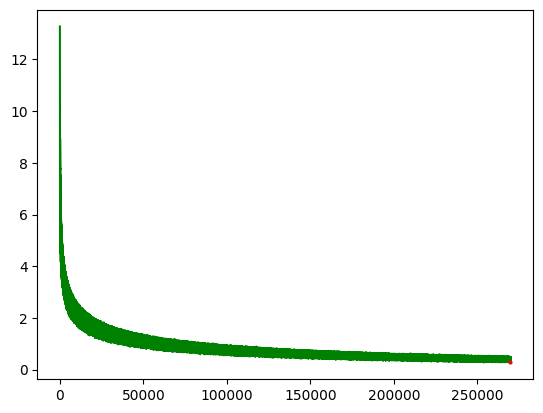

In [108]:
sgd_theta_MSLE , losses_MSLE = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'MSLE', learning_rate =0.01, delta=5)
best_loss_MSLE = min(losses_MSLE)
index_best_loss_MSLE = losses_MSLE.index(min(losses_MSLE))
best_theta_MSLE = sgd_theta_MSLE[losses_MSLE.index(min(losses_MSLE))]
print(len(losses_MSLE))
print(f'best loss is {best_loss_MSLE} with index is {index_best_loss_MSLE} and best theta is {best_theta_MSLE}')

plt.plot(losses_MSLE, color ="g")
plt.plot(index_best_loss_MSLE,best_loss_MSLE,'ro', markersize=2, label='best loss')
plt.show()

270000
best loss is 0.8665913255162827 with index is 247886 and best theta is [[115.51233388]
 [ 23.89871069]
 [169.90044395]
 [117.97106857]
 [152.56308029]]


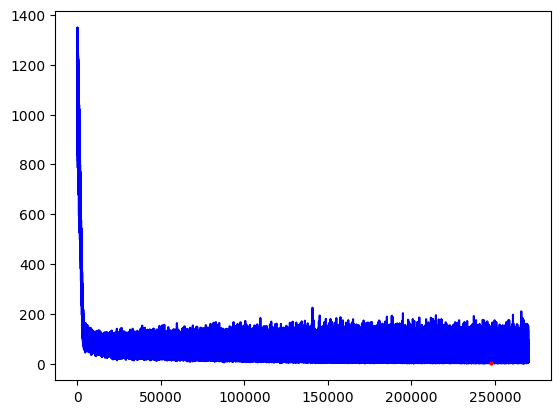

In [109]:
sgd_theta_Huber , losses_Huber = mini_batch_gradient_descent(thetas, X_1_train, y_1_train , n_epochs =10000, minibatch_size =32, loss_func = 'Huber', learning_rate =0.01, delta=5)
best_loss_Huber = min(losses_Huber)
index_best_loss_Huber = losses_Huber.index(min(losses_Huber))
best_theta_Huber = sgd_theta_Huber[losses_Huber.index(min(losses_Huber))]
print(len(losses_Huber))
print(f'best loss is {best_loss_Huber} with index is {index_best_loss_Huber} and best theta is {best_theta_Huber}')

plt.plot(losses_Huber, color ="b")
plt.plot(index_best_loss_Huber,best_loss_Huber,'ro', markersize=2, label='best loss')
plt.show()

###Comparing results by loss types

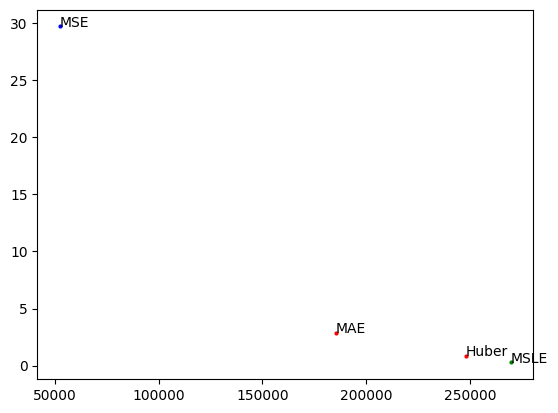

In [110]:
import matplotlib.pyplot
plt.plot(index_best_loss_MSE,best_loss_MSE,'bo', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_MSE,best_loss_MSE, "MSE")
plt.plot(index_best_loss_MAE,best_loss_MAE,'ro', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_MAE,best_loss_MAE, "MAE")
plt.plot(index_best_loss_MSLE,best_loss_MSLE,'go', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_MSLE,best_loss_MSLE, "MSLE")
plt.plot(index_best_loss_Huber,best_loss_Huber,'ro', markersize=2, label='best loss')
matplotlib.pyplot.text(index_best_loss_Huber,best_loss_Huber, "Huber")
plt.show()

###Evaluating

In [111]:
#Evaluate regression model
from sklearn.metrics import r2_score
test_y_hat_MSE = prediction(X_1_test,best_theta_MSE)
test_y_hat_MSLE = prediction(X_1_test,best_theta_MSLE)
test_y_hat_MAE = prediction(X_1_test,best_theta_MAE)
test_y_hat_Huber = prediction(X_1_test,best_theta_Huber)

print('MSE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_MSE - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_MSE - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_MSE) )
print('---')

print('MSLE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_MSLE - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_MSLE - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_MSLE) )
print('---')

print('MAE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_MAE - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_MAE - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_MAE) )
print('---')

print('Huber')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat_Huber - y_1_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat_Huber - y_1_test) ** 2))
print("R2-score: %.2f" % r2_score(y_1_test , test_y_hat_Huber) )
print('---')

MSE
Mean absolute error: 17.01
Residual sum of squares (MSE): 579.54
R2-score: 0.87
---
MSLE
Mean absolute error: 157.56
Residual sum of squares (MSE): 27510.65
R2-score: -5.32
---
MAE
Mean absolute error: 15.53
Residual sum of squares (MSE): 792.91
R2-score: 0.82
---
Huber
Mean absolute error: 13.62
Residual sum of squares (MSE): 1370.92
R2-score: 0.69
---


#Linear regression using Sklearn

##Simple linear regression

###Modeling

Coefficients:  [38.9847012]
Intercept:  125.05611030493253


Text(0, 0.5, 'Emission')

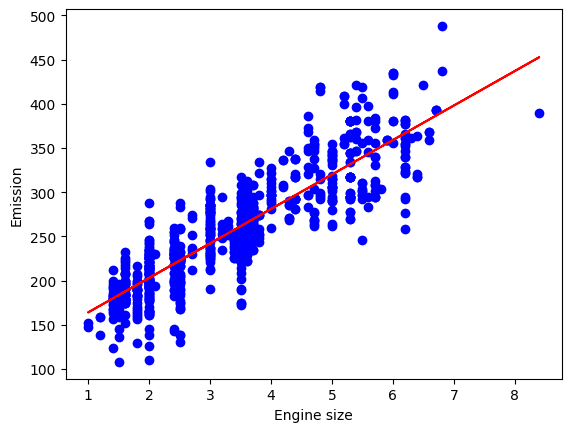

In [112]:
#Modeling - Using sklearn package to model data.
from sklearn import linear_model
ln = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train['CO2EMISSIONS']
ln.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', ln.coef_)
print ('Intercept: ',ln.intercept_)
#Plot the fit line over the data:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') #plot 2 features
plt.plot(train_x, ln.coef_[0]*train_x + ln.intercept_, '-r') #plot x and y in regression line
plt.xlabel("Engine size")
plt.ylabel("Emission")

###Evaluating

In [113]:
#Evaluate regression model
from sklearn.metrics import r2_score
test_x = test[['ENGINESIZE']]
test_y = test['CO2EMISSIONS']
test_y_hat = ln.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_hat) )

Mean absolute error: 23.21
Residual sum of squares (MSE): 983.99
R2-score: 0.77


##Multiple linear regression

###Modeling

In [114]:
from sklearn import linear_model
ln = linear_model.LinearRegression()
x = train[['ENGINESIZE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
y = train['CO2EMISSIONS']
ln.fit (x, y)
# The coefficients
print ('Coefficients: ', ln.coef_)
print ('Intercept: ',ln.intercept_)

Coefficients:  [18.78855512 -5.36238994 -7.6859057  22.35230527]
Intercept:  78.4277009919117


###Evaluating

In [115]:
#Evaluate regression model
#Prediction
y_hat= ln.predict(test[['ENGINESIZE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
x = test[['ENGINESIZE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
y = test['CO2EMISSIONS']
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % ln.score(x, y))

Residual sum of squares: 569.20
Variance score: 0.87
